In [1]:
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from googleapiclient.discovery import build
from sqlalchemy import create_engine
from jupyterthemes import jtplot
from pandas import ExcelWriter
from selenium import webdriver
from datetime import datetime
from scipy.stats import norm
from math import sqrt



import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas.io.sql as psql
import scipy.stats as st
import psycopg2 as pg
import datetime as dt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sp
import warnings
import getpass
import os.path
import pickle
import math

from functions import *

#jtplot.style()
warnings.filterwarnings('ignore')

In [2]:
user='rafael.okida'
pwd=getpass.getpass('Password:')
host='172.31.31.218'

Password: ·········


In [3]:
user_bi='rafael.okida'
pwd_bi=getpass.getpass('Password:')
host_bi='bi.redealumni.com.br'

Password: ··········


In [10]:
def offer_data(start,end,kind,level):
    offers_data_sql=open('{0}/fryves_offers_data.sql'.format(sql_dir),'r').read()
    offers_data_sql=offers_data_sql.format(start,end,kind,level)
    data=run_sql(offers_data_sql,"bi",user,pwd,'172.31.22.144')
    data['normal1'] = data['cp']/data['bp']
    data['normal2'] = data['cp']/data['cp'].mean()
    try:
        p1=sp.polyfit(data[data['bp']>0]['normal1'],data[data['bp']>0]['conversion'],1,full=True)
    except:
        p1=None
    try:
        p2=sp.polyfit(data['normal2'],data['conversion'],1,full=True)
    except:
        p2=None
    return {'start':start,\
            'end':end,\
            'p1':p1,\
            'p2':p2,\
            'cp':data['cp'].mean(),\
            'len':len(data),
            'data':data}

In [7]:
start="2017-10-01 00:00:00"
end="2018-04-01 00:00:00"
#end="2017-10-07 00:00:00"
level="1"
kind="1"

In [20]:
data = offer_data("2019-01-01 00:00:00","2019-01-31 00:00:00",1,1)

In [29]:
data['data'][['bp','cp','normal2','normal1']]

,bp,cp,normal2,normal1
0,0.000000,274.000000,0.328784,inf
1,422.165992,149.250000,0.179091,0.353534
2,422.165992,149.250000,0.179091,0.353534
3,422.165992,268.952645,0.322727,0.637078
4,499.631703,288.000731,0.345584,0.576426
5,499.631703,306.476667,0.367754,0.613405
6,459.459459,199.000000,0.238788,0.433118
7,459.459459,282.658137,0.339173,0.615197
8,459.459459,257.106977,0.308513,0.559586
9,459.459459,241.760000,0.290098,0.526184


In [164]:
test_id=13
query_analysis = open('{0}/test_offer_analysis.sql'.format(sql_dir),'r').read()
query_analysis=query_analysis.format(test_id)
analysis=run_query(query_analysis,'bi',user,pwd,host)

In [165]:
customers_a=list(analysis[(analysis['alternative']==1)\
                                  ]['customer_id'].unique())

customers_b=list(analysis[(analysis['alternative']==2)\
                               ]['customer_id'].unique())

customers_ab=list(set(customers_a) & set(customers_b))

if len(analysis[analysis['alternative']==3])>0:
    customers_c=list(analysis[(analysis['alternative']==3)\
                                   #&(date_analysis['university_id']==34)\
                                   ]['customer_id'].unique())
    customers_ac=list(set(customers_a) & set(customers_c))
    customers_bc=list(set(customers_b) & set(customers_c))
    customers_c=[customer for customer in customers_c \
                 if customer not in customers_ac and customer not in customers_bc]
else:
    customers_c=[]
    customers_ac=[]
    customers_bc=[]
customers_a=[customer for customer in customers_a \
             if customer not in customers_ab and customer not in customers_ac]
customers_b=[customer for customer in customers_b \
             if customer not in customers_ab and customer not in customers_bc]

customers=[customer for customer in customers_a+customers_b+customers_c \
       if customer not in customers_ab and customer not in customers_ac and customer not in customers_bc]

In [174]:
offers = analysis['offer_id'].tolist()

In [175]:
analysis_global[(analysis_global['checkout_step']=='paid')&(~analysis_global['id'].isin(offers))]

,id,offered_price,checkout_step,university_id,name,level,kind,price
51,19067293,199.90,paid,1828,UCA,Bacharelado (graduação),EaD,199.90
107,19205854,175.37,paid,27,UNICSUL - Cruzeiro do Sul,Tecnólogo (graduação),EaD,175.37
359,19327383,198.93,paid,57,Faculdade Pitágoras,Bacharelado (graduação),Semipresencial,198.93
508,19750363,142.79,paid,19,Estácio,Tecnólogo (graduação),EaD,285.57
692,19727604,328.50,paid,19,Estácio,Bacharelado (graduação),Flex,328.50
704,18069794,283.56,paid,1945,FIBH,Licenciatura (graduação),Presencial,141.78
753,19327134,158.20,paid,61,Unopar,Bacharelado (graduação),Semipresencial,158.20
1078,19731814,171.36,paid,19,Estácio,Tecnólogo (graduação),EaD,171.36
1105,19160677,168.86,paid,30,UNICID,Tecnólogo (graduação),EaD,337.72
1117,19181897,168.86,paid,27,UNICSUL - Cruzeiro do Sul,Licenciatura (graduação),EaD,168.86


In [173]:
start=analysis['order_created_at'].min()
    
customers_query = open('{0}/test_offer_global_analysis.sql'.format(sql_dir),'r').read()
    
analysis_global=run_query(customers_query.format(customers_c,start).replace('[','(').replace(']',')')\
                                ,'bi',user,pwd,host)

In [169]:
analysis_global['cp_op']=round(analysis_global['price']/analysis_global['offered_price'],2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef3c0709e8>]],
      dtype=object)

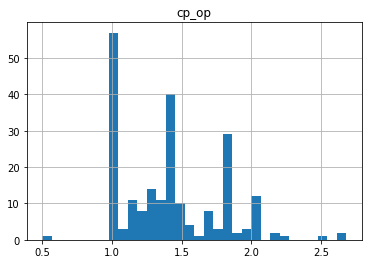

In [134]:
analysis_global[(analysis_global['checkout_step']=='paid')].hist('cp_op',bins=32)

In [135]:
analysis_global[(analysis_global['checkout_step']=='paid')]['checkout_step'].count()\
/analysis_global['checkout_step'].count()

0.0664481525625745

In [136]:
analysis_global[(analysis_global['checkout_step']=='paid')]['price'].mean()

752.8156502242153

In [139]:
len(customers_a)

571

In [141]:
analysis_global[(analysis_global['checkout_step']!='initiated')].count()

offered_price    813
checkout_step    813
price            813
dtype: int64

In [11]:
data=[]
dates=pd.date_range(start=start,end=end,freq='7D')
for i,d in enumerate(dates):
    if i < (len(dates)-1):
        data.append(offer_data(str(dates[i]),str(dates[i+1]),level,kind))

could not connect to server: Connection timed out
	Is the server running on host "172.31.22.144" and accepting
	TCP/IP connections on port 5432?



UnboundLocalError: local variable 'conn' referenced before assignment

In [83]:
data

[{'cp': nan,
  'end': '2018-10-08 00:00:00',
  'len': 0,
  'p1': None,
  'p2': None,
  'start': '2018-10-01 00:00:00'},
 {'cp': nan,
  'end': '2018-10-15 00:00:00',
  'len': 0,
  'p1': None,
  'p2': None,
  'start': '2018-10-08 00:00:00'},
 {'cp': nan,
  'end': '2018-10-22 00:00:00',
  'len': 0,
  'p1': None,
  'p2': None,
  'start': '2018-10-15 00:00:00'},
 {'cp': nan,
  'end': '2018-10-29 00:00:00',
  'len': 0,
  'p1': None,
  'p2': None,
  'start': '2018-10-22 00:00:00'},
 {'cp': nan,
  'end': '2018-11-05 00:00:00',
  'len': 0,
  'p1': None,
  'p2': None,
  'start': '2018-10-29 00:00:00'},
 {'cp': nan,
  'end': '2018-11-12 00:00:00',
  'len': 0,
  'p1': None,
  'p2': None,
  'start': '2018-11-05 00:00:00'},
 {'cp': nan,
  'end': '2018-11-19 00:00:00',
  'len': 0,
  'p1': None,
  'p2': None,
  'start': '2018-11-12 00:00:00'},
 {'cp': nan,
  'end': '2018-11-26 00:00:00',
  'len': 0,
  'p1': None,
  'p2': None,
  'start': '2018-11-19 00:00:00'},
 {'cp': nan,
  'end': '2018-12-03 00:00:

In [55]:
with open('out4.txt','wb') as outfile:
    pickle.dump(data,outfile)

In [87]:
with open('out4.txt','r') as outfile:
    data=pickle.load(outfile)
    

In [89]:
start=[]
p0=[]
for x in data:
    start.append(aux)
    #p0.append(-x['p1'][0][1]/x['p1'][0][0]/2)
    p0.append(x['p1'][0][0])
    print str(x['start'])+': '+str(x['p1'][0][0])+'--'+str(x['cp'])

2017-10-01 00:00:00: 0.08945811329927421--583.797177032
2017-10-08 00:00:00: -0.050505651647824806--652.886530075
2017-10-15 00:00:00: -0.020175080632762358--608.209304797
2017-10-22 00:00:00: 0.04232280012452599--807.049509771
2017-10-29 00:00:00: -0.05547765838298545--663.901781238
2017-11-05 00:00:00: -0.07882206915054442--643.71917949
2017-11-12 00:00:00: -0.07683034922268817--618.797804997
2017-11-19 00:00:00: -0.06589662349726914--696.354166816
2017-11-26 00:00:00: -0.08269036791945962--692.766403263
2017-12-03 00:00:00: -0.10219629738234355--656.560927622
2017-12-10 00:00:00: -0.06707430977976382--644.567226854
2017-12-17 00:00:00: -0.10683961552483995--549.673894902
2017-12-24 00:00:00: -0.022270624215707902--593.87611569
2017-12-31 00:00:00: -0.11272863646154943--596.912947198
2018-01-07 00:00:00: -0.13491172974390947--569.464602762
2018-01-14 00:00:00: -0.10160457528668716--698.719607362
2018-01-21 00:00:00: -0.06770236993538425--814.370772763
2018-01-28 00:00:00: -0.07556077

424.97494172513996


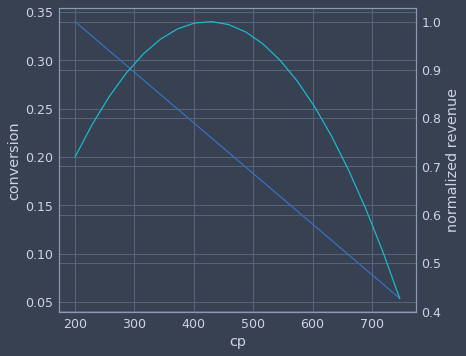

In [63]:
x=np.linspace(199.9,746.706666667,20)
y=np.linspace(0.34,0.054,20)
p=sp.polyfit(x,y,1)
print -p[1]/2/p[0]

fig, axis = plt.subplots()
axis.plot(x,x*p[0]+p[1])
axis.set_xlabel("cp")
#axis.set_xlabel("cp")
axis.set_ylabel("conversion")
axis2 = axis.twinx()
rev = (p[0]*(x**2)+p[1]*x)
max_rev = (p[0]*(x**2)+p[1]*x).max()
axis2.plot(x,rev/max_rev,color='tab:cyan')
axis2.set_ylabel('normalized revenue')
fig.savefig('ulbra.png', bbox_inches='tight')

821.8955144694529


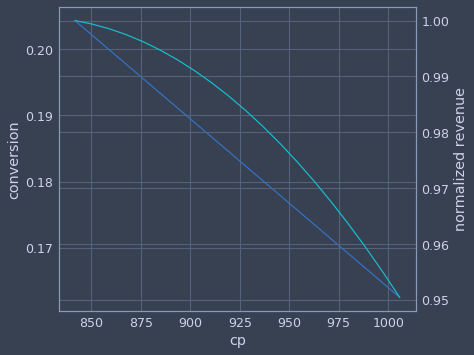

In [9]:
x=np.linspace(841.71,1005.82,20)
y=np.linspace(19./93.,13./80.,20)
p=sp.polyfit(x,y,1)
print -p[1]/2/p[0]

fig, axis = plt.subplots()
axis.plot(x,x*p[0]+p[1])
axis.set_xlabel("cp")
#axis.set_xlabel("cp")
axis.set_ylabel("conversion")
axis2 = axis.twinx()
rev = (p[0]*(x**2)+p[1]*x)
max_rev = (p[0]*(x**2)+p[1]*x).max()
axis2.plot(x,rev/max_rev,color='tab:cyan')
axis2.set_ylabel('normalized revenue')
fig.savefig('metodista.png', bbox_inches='tight')

In [45]:
data[0]['start']

'2017-10-01 00:00:00'

In [16]:
offers_data_sql=open('{0}/fryves_offers_data.sql'.format(sql_dir),'r').read()
offers_data_sql=offers_data_sql.format(date_start,date_end,kind,level)
offers_data=run_sql(offers_data_sql,"bi",user,pwd,'172.31.22.144')

In [56]:
offers_data

,university_id,state,family_old,canonical_course_name,offered_price,full_price,discount_percentage,commercial_discount,real_discount,cp,real_discount_value,total_orders,paid_orders,conversion,searches,bp
0,5,SP,Artes,Moda,274.000000,685.000000,0.600000,NaN,NaN,274.000000,NaN,18,8,0.44,11.0,488.636364
1,5,SP,Ciências Exatas,Ciência da Computação,298.900000,610.000000,0.510000,NaN,NaN,298.900000,NaN,11,4,0.36,14.0,378.571429
2,5,SP,Licenciaturas,Geografia,149.250000,497.500000,0.700000,0.00,0.700000,149.250000,348.600000,28,8,0.29,1267.0,480.840568
3,5,SP,Licenciaturas,História,149.250000,497.500000,0.700000,0.00,0.700000,149.250000,348.600000,126,48,0.38,1267.0,480.840568
4,5,SP,Licenciaturas,Letras - Espanhol,149.250000,497.500000,0.700000,0.00,0.700000,149.250000,348.600000,13,6,0.46,1267.0,480.840568
5,5,SP,Licenciaturas,Letras - Inglês,149.250000,497.500000,0.700000,NaN,NaN,149.250000,NaN,26,7,0.27,1267.0,480.840568
6,5,SP,Licenciaturas,Letras - Português,149.250000,497.500000,0.700000,0.00,0.700000,149.250000,348.600000,72,22,0.31,1267.0,480.840568
7,5,SP,Licenciaturas,Pedagogia,262.998263,607.162159,0.564714,0.00,0.602615,264.763245,366.480154,263,96,0.37,1267.0,480.840568
8,5,SP,Negócios,Administração,290.454083,747.500000,0.611433,NaN,NaN,290.455831,NaN,269,118,0.44,1192.0,484.647651
9,5,SP,Negócios,Ciências Contábeis,304.870610,747.500000,0.592140,NaN,NaN,304.876976,NaN,81,36,0.44,1192.0,484.647651


In [57]:
pres = offers_data

In [55]:
ead = a

In [59]:
ead

,university_id,state,family_old,canonical_course_name,offered_price,full_price,discount_percentage,commercial_discount,real_discount,cp,real_discount_value,total_orders,paid_orders,conversion,searches,bp
0,6,BA,Licenciaturas,Pedagogia,177.500000,250.000000,0.289400,NaN,NaN,177.650000,NaN,0,0,0.00,NaN,0.000000
1,6,BA,Licenciaturas,Pedagogia (segunda Licenciatura),177.500000,250.000000,0.289400,0.0,0.29,177.650000,72.500,3,0,0.00,NaN,0.000000
2,6,BA,Negócios,Administração,201.600000,336.000000,0.395400,0.0,0.40,203.150000,134.400,1,0,0.00,NaN,0.000000
3,6,BA,Negócios,Ciências Econômicas,201.600000,336.000000,0.395400,NaN,NaN,203.150000,NaN,1,0,0.00,NaN,0.000000
4,6,BA,Tecnólogos,Análise e Desenvolvimento de Sistemas,194.560000,304.000000,0.359700,NaN,NaN,194.650000,NaN,0,0,0.00,1.0,125.000000
5,6,BA,Tecnólogos,Eventos,185.440000,304.000000,0.387700,0.0,0.39,186.148571,118.560,2,0,0.00,1.0,125.000000
6,6,BA,Tecnólogos,Gestão Comercial,185.440000,304.000000,0.387700,NaN,NaN,186.150000,NaN,1,0,0.00,1.0,125.000000
7,6,BA,Tecnólogos,Gestão Pública,185.440000,304.000000,0.387700,NaN,NaN,186.150000,NaN,2,0,0.00,1.0,125.000000
8,6,BA,Tecnólogos,Logística,185.440000,304.000000,0.387700,NaN,NaN,186.150000,NaN,1,0,0.00,1.0,125.000000
9,6,BA,Tecnólogos,Redes de Computadores,194.560000,304.000000,0.359700,NaN,NaN,194.650000,NaN,6,1,0.17,1.0,125.000000


In [10]:
a.columns

Index([u'university_id', u'state', u'family_old', u'canonical_course_name',
       u'offered_price', u'full_price', u'discount_percentage',
       u'commercial_discount', u'real_discount', u'cp', u'real_discount_value',
       u'total_orders', u'paid_orders', u'conversion', u'searches', u'bp'],
      dtype='object')

In [416]:
a=ead

In [417]:
a['cp'].mean()

281.4500229100627

In [418]:
a['cp'].max()

939.02

In [407]:
a[a['bp']>0]['bp'].mean()

660.8181182409699

In [408]:
b=a[\
    #(a['bp']>0)\
    #&(a['searches']>20)\
    (a['total_orders']>20)].copy()

In [421]:
#a['normal'] = a['cp']/a['cp'].mean()
#b['normal'] = b['cp']/b['bp']
b['normal'] = b['cp']/b['cp'].mean()
#b['normal'] = b['cp']/b['discount_percentage']/100

In [422]:
b

,university_id,state,family_old,canonical_course_name,offered_price,full_price,discount_percentage,commercial_discount,real_discount,cp,real_discount_value,total_orders,paid_orders,conversion,searches,bp,normal
2,5,SP,Licenciaturas,Geografia,149.250000,497.500000,0.700000,0.000000,0.700000,149.250000,348.600000,28,8,0.29,1267.0,480.840568,0.181385
3,5,SP,Licenciaturas,História,149.250000,497.500000,0.700000,0.000000,0.700000,149.250000,348.600000,126,48,0.38,1267.0,480.840568,0.181385
5,5,SP,Licenciaturas,Letras - Inglês,149.250000,497.500000,0.700000,NaN,NaN,149.250000,NaN,26,7,0.27,1267.0,480.840568,0.181385
6,5,SP,Licenciaturas,Letras - Português,149.250000,497.500000,0.700000,0.000000,0.700000,149.250000,348.600000,72,22,0.31,1267.0,480.840568,0.181385
7,5,SP,Licenciaturas,Pedagogia,262.998263,607.162159,0.564714,0.000000,0.602615,264.763245,366.480154,263,96,0.37,1267.0,480.840568,0.321769
8,5,SP,Negócios,Administração,290.454083,747.500000,0.611433,NaN,NaN,290.455831,NaN,269,118,0.44,1192.0,484.647651,0.352993
9,5,SP,Negócios,Ciências Contábeis,304.870610,747.500000,0.592140,NaN,NaN,304.876976,NaN,81,36,0.44,1192.0,484.647651,0.370520
12,5,SP,Tecnólogos,Eventos,199.000000,497.500000,0.600000,NaN,NaN,199.000000,NaN,27,6,0.22,1522.0,500.295664,0.241846
13,5,SP,Tecnólogos,Gestão Financeira,283.009793,620.292414,0.542474,0.000000,0.403636,283.043678,244.447273,67,32,0.48,1522.0,500.295664,0.343985
14,5,SP,Tecnólogos,Gestão de Tecnologia da Informação,252.636585,617.926829,0.591220,NaN,NaN,252.636585,NaN,35,14,0.40,1522.0,500.295664,0.307031


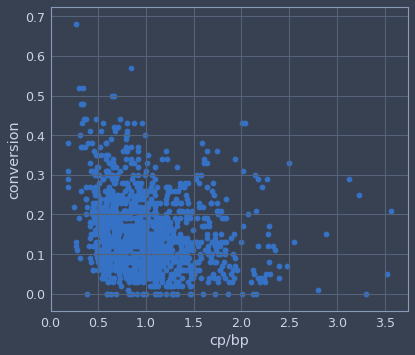

In [423]:
plt.scatter(b['normal'],\
            b['conversion'])
plt.xlabel('cp/bp');
plt.ylabel('conversion');
#plt.savefig('test.png')

In [424]:
#d=b[(b['normal']<2.25)&(b['normal']>0.6)]
d=b[(b['normal']<1.8)&(b['normal']>0.3)]

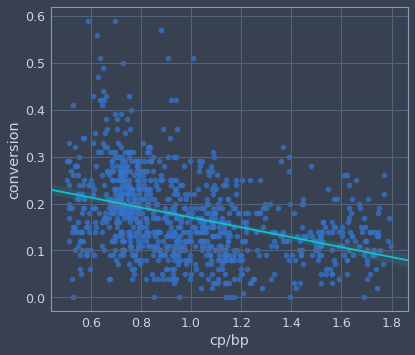

In [420]:
sb = sns.regplot(d['normal'],d['conversion'],line_kws={'color':'tab:cyan'})
sb.set(xlabel='cp/bp',ylabel='conversion')
sb.get_figure().savefig('dist.png', bbox_inches='tight')

In [396]:
p=sp.polyfit(d['normal'],d['conversion'],1)

In [397]:
p[0]

-0.10576869693654696

In [398]:
p[1]

0.2761794029548869

In [399]:
m=-p[1]/2/p[0]

In [400]:
m

1.3055819488849958

Text(0,0.5,'conversion')

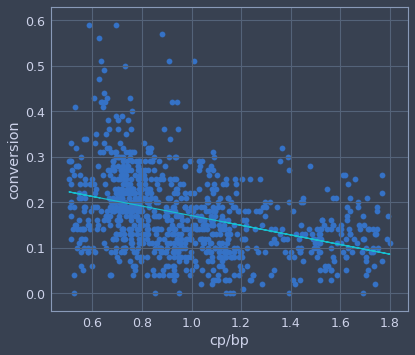

In [401]:
fig, axis = plt.subplots()
axis.scatter(d['normal'],d['conversion'])
axis.plot(d['normal'],d['normal']*p[0]+p[1],color='tab:cyan')
axis.set_xlabel("cp/bp")
axis.set_ylabel("conversion")
#axis.set_ylim(0,0.36)
#axis.set_xlim(1,2.4)

In [402]:
c = coalesce(0.4,1.8,.1,d,'normal','conversion')
#c = coalesce(3,12,1,d,'normal','conversion')

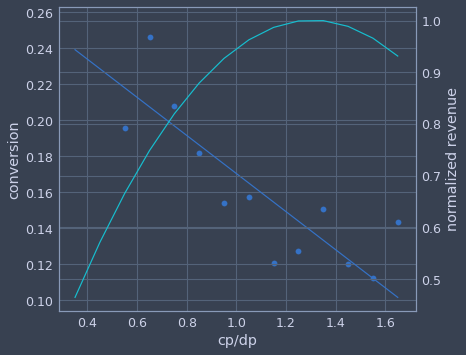

In [404]:
fig, axis = plt.subplots()
axis.scatter(c['x'],c['y'])
axis.plot(c['x'],c['x']*p[0]+p[1])
axis.set_xlabel("cp/dp")
#axis.set_xlabel("cp")
axis.set_ylabel("conversion")
axis2 = axis.twinx()
rev = (p[0]*(c['x']**2)+p[1]*c['x'])*d['cp'].mean()
max_rev = ((p[0]*(c['x']**2)+p[1]*c['x'])*d['cp'].mean()).max()
axis2.plot(c['x'],rev/max_rev,color='tab:cyan')
axis2.set_ylabel('normalized revenue')
fig.savefig('curve_ead_bp.png', bbox_inches='tight')

In [385]:
((p[0]*(c['x']**2)+p[1]*c['x'])*d['bp'].mean()).max()


76.67689162070964

In [221]:
online_sql=open('{0}/online_offers_bp.sql'.format(sql_dir),'r').read()
online_sql=online_sql.format(kind,level)
online=run_sql(online_sql,"querobolsa_production",user,pwd)

In [222]:
online


,university_id,state,family_old,canonical_course_name,shift,offered_price,full_price,discount_percentage,commercial_discount,real_discount,cp,real_discount_value,total_orders,paid_orders,conversion,searches,max_value,goal,ka
0,19,BA,Licenciaturas,Física,11,154.219500,342.710000,0.550000,0.3,0.357143,308.440000,85.750000,1,0,0.00,31.0,445.161290,1.049219e+07,Rafaela Godoy Fantinatto
1,19,BA,Licenciaturas,Geografia,11,154.219500,342.710000,0.550000,0.3,0.357143,308.440000,85.750000,1,0,0.00,31.0,445.161290,1.049219e+07,Rafaela Godoy Fantinatto
2,19,BA,Licenciaturas,História,11,156.363000,347.473333,0.550000,0.3,0.357143,312.726667,86.916667,2,0,0.00,31.0,445.161290,1.049219e+07,Rafaela Godoy Fantinatto
3,19,BA,Licenciaturas,História,11,186.363000,414.140000,0.550000,0.3,0.357143,372.720000,103.500000,1,0,0.00,31.0,445.161290,1.049219e+07,Rafaela Godoy Fantinatto
4,19,BA,Licenciaturas,Letras - Espanhol,11,154.219500,342.710000,0.550000,0.3,0.357143,308.440000,85.750000,1,0,0.00,31.0,445.161290,1.049219e+07,Rafaela Godoy Fantinatto
5,19,BA,Licenciaturas,Letras - Inglês,11,141.363000,314.140000,0.550000,0.3,0.357143,282.730000,78.625000,1,0,0.00,31.0,445.161290,1.049219e+07,Rafaela Godoy Fantinatto
6,19,BA,Licenciaturas,Letras - Português,11,141.363000,314.140000,0.550000,0.3,0.357143,282.730000,78.625000,1,0,0.00,31.0,445.161290,1.049219e+07,Rafaela Godoy Fantinatto
7,19,BA,Licenciaturas,Matemática,11,154.219500,342.710000,0.550000,0.3,0.357143,308.440000,85.750000,1,0,0.00,31.0,445.161290,1.049219e+07,Rafaela Godoy Fantinatto
8,19,BA,Licenciaturas,Pedagogia,11,165.943059,368.762353,0.550000,0.3,0.357143,331.884706,92.205882,8,0,0.00,31.0,445.161290,1.049219e+07,Rafaela Godoy Fantinatto
9,19,BA,Licenciaturas,Química,11,154.219500,342.710000,0.550000,0.3,0.357143,308.440000,85.750000,1,0,0.00,31.0,445.161290,1.049219e+07,Rafaela Godoy Fantinatto


In [12]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df =pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [14]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [16]:
X = df
y = boston_data.target

In [19]:
len(X)


506

In [94]:
query='''
with o as (
    select distinct on (base_users.customer_id)
        orders.created_at::date created_at,
        case when orders.refunded_at is not null and orders.checkout_step='paid' 
            then 'refunded'
        else orders.checkout_step end checkout_step,
        orders.id,
        base_users.customer_id,
        line_items.price,
        --offers.offered_price,
        case when max(offer_special_conditions.discount_percentage)>=100. then 'qb+'
            else 'simples' end "qb+",
        case when university_billing_configurations.id is not null then 'qap'
            else 'nqap' end qap
    from querobolsa_production.orders
        join querobolsa_production.base_users on base_users.id=orders.base_user_id
        join querobolsa_production.line_items on line_items.order_id=orders.id
        join querobolsa_production.offers on offers.id=line_items.offer_id
        join querobolsa_production.courses on courses.id=offers.course_id
        join querobolsa_production.levels on levels.name=courses.level
        join querobolsa_production.kinds on kinds.name=courses.kind
        left join querobolsa_production.university_billing_configurations
            on university_billing_configurations.university_id=offers.university_id
            and university_billing_configurations.level_id=levels.parent_id
            and university_billing_configurations.kind_id=kinds.parent_id
            and orders.created_at>university_billing_configurations.created_at
            and (orders.created_at<university_billing_configurations.enabled_until
                or university_billing_configurations.enabled)
        left join querobolsa_production.offer_special_conditions_offers 
            on offer_special_conditions_offers.offer_id=offers.id
        left join querobolsa_production.offer_special_conditions
            on offer_special_conditions.id=offer_special_conditions_offers.offer_special_condition_id
    where
        orders.created_at>='2018-10-01'
        and levels.parent_id=1
    group by
        orders.created_at::date,
        orders.checkout_step,
        orders.id,
        base_users.customer_id,
        line_items.price,
        university_billing_configurations.id
    order by base_users.customer_id, orders.updated_at desc
)

select
    o.created_at,
    count(o.customer_id) customers,
    sum(case when o.checkout_step='paid' then o.price
        else 0. end) revenue,
    o."qb+"
from o
where o.qap='nqap'
group by 1,4
order by 1
'''

In [95]:
orders=run_query(query,'bi',user,pwd,host)

In [96]:
orders

,created_at,customers,revenue,qb+
0,2018-10-01,1472,68817.45,qb+
1,2018-10-01,497,15222.72,simples
2,2018-10-02,1622,80801.07,qb+
3,2018-10-02,563,12851.20,simples
4,2018-10-03,1474,66402.48,qb+
5,2018-10-03,560,12229.48,simples
6,2018-10-04,1506,65734.81,qb+
7,2018-10-04,405,9287.15,simples
8,2018-10-05,1286,57045.12,qb+
9,2018-10-05,524,11538.06,simples


In [67]:
orders_back=orders.copy(deep=True)

In [ ]:
orders

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


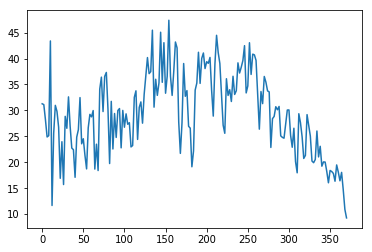

In [90]:
orders_qbp=orders.loc[(orders['qb+']=='qb+')]

orders_qbp['created_at']=orders_qbp.index

orders_qbp['rpc']=orders_qbp['revenue']/orders_qbp['customers']

plt.plot(orders_qbp['created_at'],orders_qbp['rpc'])

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


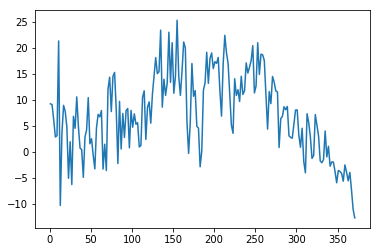

In [89]:
orders_s=orders.loc[(orders['qb+']=='simples')]

orders_s['created_at']=orders_s.index

orders_s['rpc']=orders_s['revenue']/orders_s['customers']

plt.plot(orders_s['created_at'],orders_qbp['rpc'].subtract(orders_s['rpc'].iloc[0]))
#plt.plot(orders_qbp['created_at'],orders_qbp['rpc'])

In [84]:
orders_s['rpc'].div(orders_qbp['rpc'][0])

1      0.704477
3      0.550989
5      0.558874
7      0.475812
9      0.483183
11     0.782074
13     0.306109
15     0.367676
17     0.562763
19     0.383001
21     0.532151
23     0.792907
25     0.731418
27     0.389317
29     0.604968
31     0.428478
33     0.747352
35     0.525958
37     0.540856
39     0.649806
41     0.370486
43     0.668055
45     0.626964
47     0.767313
49     0.697774
51     0.768261
53     0.461512
55     0.429064
57     0.864661
59     0.705944
         ...   
313    0.706287
315    0.952118
317    1.004476
319    0.640479
321    0.705990
323    0.845238
325    0.844144
327    0.817568
329    0.575462
331    0.730952
333    0.554997
335    0.443074
337    0.932231
339    0.628891
341    1.316125
343    0.552783
345    0.719683
347    0.544119
349    0.369512
351    0.419266
353    0.511890
355    0.720188
357    0.519749
359    0.690860
361    0.484116
363    0.577775
365    0.374170
367    0.483099
369    0.199457
371    0.090096
Name: rpc, Length: 186, 

In [212]:
test_query = open('{0}/test.sql'.format(sql_dir),'r').read()

In [213]:
test_query=test_query.format('','2992','--','','--','','--','')

In [214]:
test=run_query(test_query,'querobolsa_production',user_bi,pwd_bi,host_bi)

In [215]:
test_query

"select\n    offers.id offer_id\n    ,'frozen' as status\nfrom offers\n    join courses on courses.id=offers.course_id\n    join levels on levels.name=courses.level\n        and levels.parent_id is not null\n    join kinds on kinds.name=courses.kind\n        and kinds.parent_id is not null\nwhere\n    1=1\n    and offers.enabled\n    and offers.university_id=2992\n    --and kinds.parent_id=\n    --and levels.parent_id=\n    --and courses.campus_id in ()\n"

In [216]:
test

,offer_id,status
0,19662649,frozen
1,19662650,frozen
2,19662651,frozen


In [217]:
xlsx=df2xlsx(test)

In [218]:
test_xlsx_2019_05_28_06_13_57.xlsx

{'df':    offer_id  status
 0  19662649  frozen
 1  19662650  frozen
 2  19662651  frozen, 'file_name': 'test_xlsx_2019_05_23_18_23_02.xlsx'}

In [219]:
upload_xlsx(xlsx['file_name'],user,pwd)

In [220]:
upload_xlsx('test_xlsx_2019_05_28_06_13_57.xlsx',user,pwd)